In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
prices = yf.download(['PLTR','MELI'], start='2020-01-01')['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


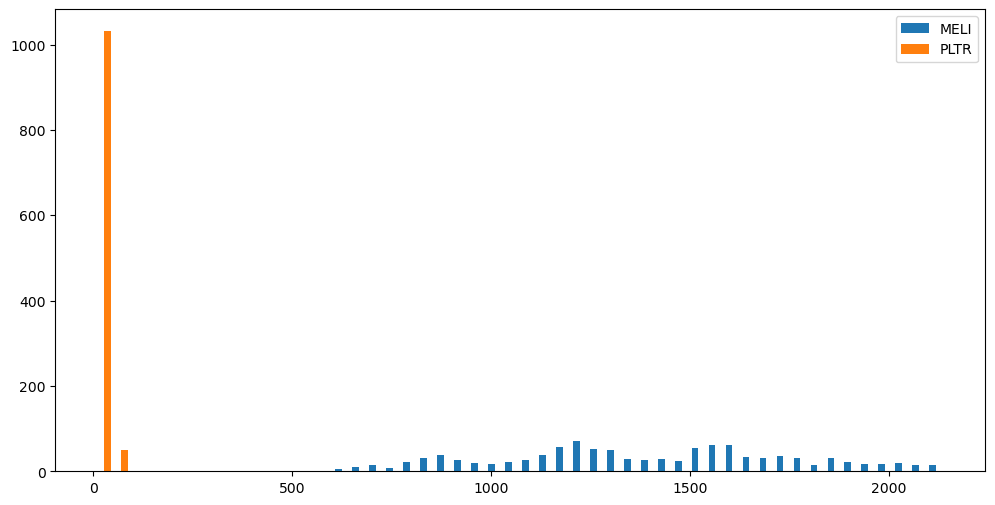

In [3]:
plt.figure(figsize=(12,6))
plt.hist(prices, label=prices.columns, bins = 50)
plt.legend()
plt.show()

In [4]:
rends = prices.pct_change().dropna()

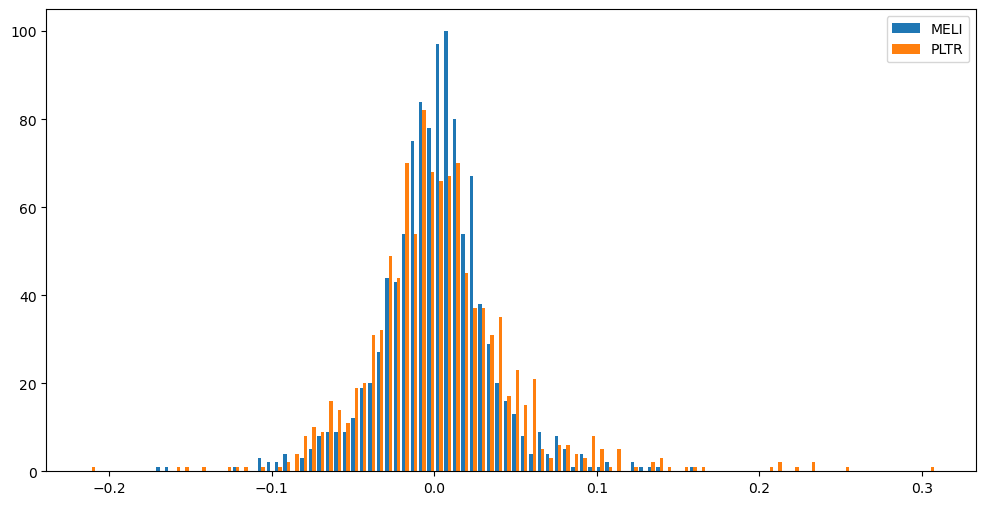

In [5]:
plt.figure(figsize=(12,6))
plt.hist(rends, label=rends.columns, bins = 100)
plt.legend()
plt.show()

In [6]:
rends.head()

Ticker,MELI,PLTR
Date,,
2020-10-01 00:00:00+00:00,0.030356,-0.004211
2020-10-02 00:00:00+00:00,-0.032286,-0.027484
2020-10-05 00:00:00+00:00,0.010423,-0.018478
2020-10-06 00:00:00+00:00,0.000743,0.096346
2020-10-07 00:00:00+00:00,0.049121,0.010101


In [7]:
rends.mean()*252*100

Ticker
MELI    26.209908
PLTR    72.096566
dtype: float64

In [8]:
rends.std()*np.sqrt(252)*100

Ticker
MELI    52.652421
PLTR    71.587855
dtype: float64

In [9]:
rends.skew()

Ticker
MELI   -0.006798
PLTR    1.126382
dtype: float64

In [10]:
rends.kurtosis()

Ticker
MELI    3.092065
PLTR    6.220677
dtype: float64

<Axes: xlabel='Ticker'>

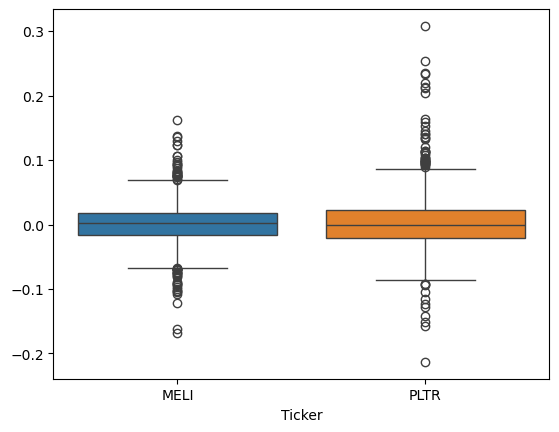

In [11]:
import seaborn as sns
sns.boxplot(data=rends)

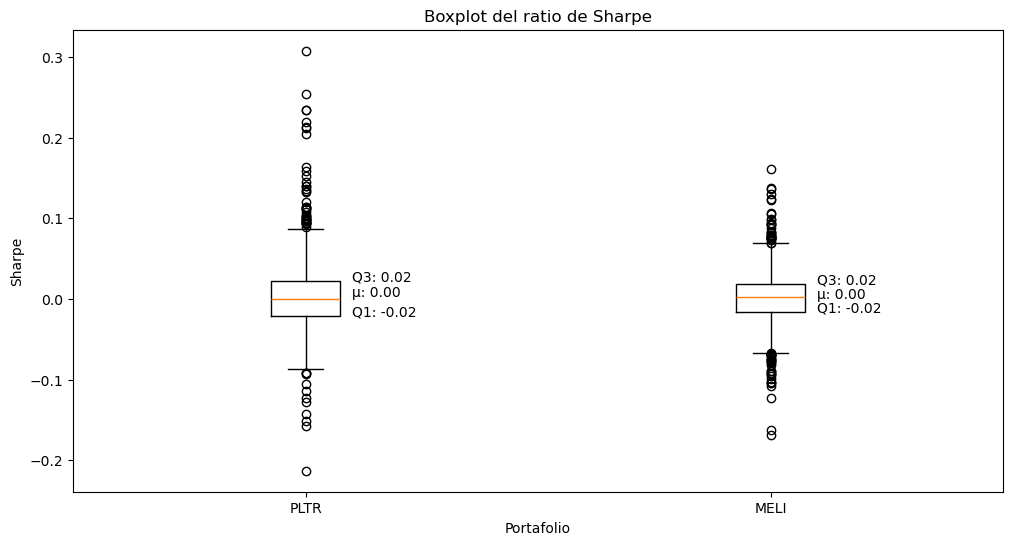

In [12]:
plt.figure(figsize=(12, 6))
# Preparar los datos
data = [
rends['PLTR'],
rends['MELI'],
]

labels = ['PLTR', 'MELI']

# Crear el boxplot
plt.boxplot(data, vert=True, tick_labels=labels)

# Añadir anotaciones para cada grupo de datos
for i, group in enumerate(data):
    # Calcular estadísticas
    mean = np.mean(group)
    q1 = np.percentile(group, 25)
    q3 = np.percentile(group, 75)
    
    # Añadir texto para cada estadística
    plt.text(i + 1.1, q3, f"Q3: {q3:.2f}", fontsize=10, color='black')
    plt.text(i + 1.1, mean, f"μ: {mean:.2f}", fontsize=10, color='black')
    plt.text(i + 1.1, q1, f"Q1: {q1:.2f}", fontsize=10, color='black')


# Personalizar el gráfico
plt.title('Boxplot del ratio de Sharpe')
plt.xlabel('Portafolio')
plt.ylabel('Sharpe')
plt.show()